#**Tutorial 2**

Neste tutorial vamos:
- converter uma imagem para modelos de cores diferetes
  - BRG para RGB
  - RGB para GRAY (cinza)
  - GRAY para BINÁRIA (preto/branco)
- realizar pré-processamentos
  - ajustar brilho
  - ajustar contraste
  - negativo
  - equalização


##Passo 1: Carregar as dependências

*   [Numpy](https://www.numpy.org/) é uma biblioteca para manipular matrizes/vetores.
*   [Pandas](https://pandas.pydata.org/) é uma biblioteca para manipular e analisar dados.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) é uma biblioteca com diversas funcionalidades de visão computacional.
*   [Skimage](https://scikit-image.org/) é uma biblioteca que suporta aplicações de processamento de imagem em python.
*   [PIL](https://pypi.org/project/Pillow/) é uma biblioteca que adiciona suporte à abertura e gravação de muitos formatos de imagem diferentes.
*   [Matplotlib](https://matplotlib.org/) é uma biblioteca que gera figuras e gráficos.









In [1]:
import numpy as np
import pandas as pd
import cv2 as cv  # para exibir imagens dentro do COLAB
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

##Passo 2: converter uma imagem para modelos de cores diferetes

> Antes de praticar, leia o material de apoio chamado "PDI_Tutorial_2.pdf". 
Reparem que existem os ESPAÇOS DE CORES e os MODELOS DE CORES.


##Passo 2a: Imagens coloridas
> Note que o mais comum para imagens coloridas é trabalhar com canais de cores RGB (Red, Green, Blue). Entretanto no openCV o padrão usado é BGR (Blue, Green, Red). Mas já vimos no Tutorial 1 que é possível fazer essa conversão de BGR para RGB, mas vamos relembrar abaixo.


In [2]:
# permite que seja utilizada imagens do computador. Faz o upload do arquivo do seu computador para a nuvem aqui do Colab
# caso estivesse programando numa IDE no seu computador ao invés do Colab, não precisaria deste comando, bastaria informar o diretório completo dentro do imread
# from google.colab import files
# uploaded = files.upload()

print('='*100)
print('ler e exibir uma imagem em BGR')
print('='*100)

imagemBGR = cv.imread('C:/Users/pedro/OneDrive/ADS/3TERMO/VISAO COMPUTACIONAL I/Tutorial_2_PDI (1)/Tutorial_2_PDI/frutas.jpg') # note que o OpenCV faz a leitura de imagens coloridas como BGR 
cv.imshow('imagem BGR',imagemBGR) # exibe a imagem em BGR (cores OK)

print('='*100)
print('converter uma imagem BGR para RGB e exibir em RGB - ERRADO')
print('='*100)

imagemRGB = cv.cvtColor(imagemBGR, cv.COLOR_BGR2RGB) # converte BGR para RGB
cv.imshow('imagem RGB',imagemRGB) # exibe a imagem em RGB (cores trocadas, pois a visualização com OpenCV deve receber BGR e não RGB)

cv.waitKey(0)

cv.destroyAllWindows()

ler e exibir uma imagem em BGR
converter uma imagem BGR para RGB e exibir em RGB - ERRADO


#### FAÇA #1: Ler e exibir uma imagem COLORIDA do seu computador

Além de imagens da internet é possível processar imagens salvas no seu comptuador. Conforme demonstrado acima, por estarmos utilizando o Colab, é preciso fazer o upload da imagem do seu computador para a núvem do Colab.

Faça: 
1.   escolher uma imagem COLORIDA do seu computador. Caso não queira, baixe uma da internet e salve no seu computador 
2.   fazer o upload da imagem desejada para o Colab
3.   ler a imagem
4.   exibir a imagem

In [3]:
# FAÇA AQUI O SEU CÓDIGO




##Passo 2b: Imagens em tons de cinza

> Outro formato muito comum de processar imagens são imagens em tons de cinza (GRAY). Na verdade, na literatura existem muito mais técnicas para processar imagens em tons de cinza do que imagens coloridas. Certamente é mais confortável para os olhos ver uma imagem colorida, mas para o computador na maioria das aplicações práticas, processar imagens coloridas levam mais tempo pois são 3 matrizes, diferente das em tons de cinza (ou preto e branco) que é apenas 1 matriz, mesmo assim, obtém valores satisfatórios para as apliações. Entretanto, para projetos específicos e bem controlados, as vezes processar por cor facilita muito para o algoritmo, isto acontece quando uma cor é muito presente na imagem. 

> Na prática, converter uma imagem colorida (RGB) para cinza (GRAY) manualmente (sem o uso de funções prontas) é uma tarefa relativamente simples, basta realizar a média do pixel RGB. Como assim? Pegue 1 pixel qualquer da imagem, acesse as matrizes RGB e faça a média. 

> Ex: `GRAY[0,0] = (R[0,0] + G[0,0] + B[0,0]) / 3`

>> No exemplo acima, estaríamos somando o primeiro pixel (linha=0, coluna=0) de cada canal de cor (R, G e B) e dividindo por 3, ou seja, fazendo uma média. Em seguida, basta usar uma estrutura de repetição que repita esse processo para todos os outros pixels. Como resultado final será uma matriz GRAY com os valores em tons de cinza. Agora bastaria exibir esta matriz GRAY que seria visualizada a imagem em tons de cinza. No dia-a-dia não fazemos esse processamento manualmente, pois existem funções prontas que realizar esta conversão, que serão demonstradas logo abaixo.

> Assim como nas imagens coloridas, os pixels de uma imagem em tons de cinza possuem valores entre 0 e 255, ou seja, representam assim as intensidades. Note que o valor do pixel quando mais próximo de 0 for, mais escuro (preto) é o pixel, em contrapartida, quanto mais próximo de 255 for, mais claro (branco) será o pixel. No intervalo de 0 a 255, estão os tons de cinza, formando um grandiente, indo do preto até o branco.


In [4]:
print('='*100)
print('converter uma imagem BGR para GRAY e exibir em GRAY')
print('='*100)

GRAY = cv.cvtColor(imagemBGR, cv.COLOR_BGR2GRAY)
cv.imshow('',GRAY)

cv.waitKey(0)

cv.destroyAllWindows()

converter uma imagem BGR para GRAY e exibir em GRAY


#### FAÇA #2: Converter a imagem COLORIDA do seu computador para CINZA

1.   converter a imagem COLORIDA do seu computador para CINZA 
2.   exibir a imagem em tons de CINZA

In [5]:
# FAÇA AQUI O SEU CÓDIGO




##Passo 2c: Imagens em preto e branco (binária)

> É comum na literatura ser encontrado o termo imagem binária, que na verdade é uma imagem em preto e branco. Isto porque diferente das imagens coloridas e em tons de cinza, as imagens em preto e branco (binária) só permitem dois valores de intensidade, 0 (preto) ou 255 (branco), daí que vem o nome binário, ou seja, apenas 2 valores, preto ou branco. 

> Na prática, o caminho correto é converter uma imagem colorida (RGB) para cinza (GRAY), para em seguida converter de cinza (GRAY) para preto e branco (binária). Para fazer esta conversão manualmente (sem o uso de funções prontas) também é uma tarefa relativamente simples, basta escolher uma valor entre 0 e 255 que será chamado de thresholding. Baseado neste thresholding, é necessário percorrer a matriz da imagem em tons de cinza (GRAY) conferindo se o valor do pixel atual está abaixo ou acima desse thresholding, caso esteja abaixo, ele será modificado para 0, caso contrário (esteja acima) será modificado para 255.

> Novamente, no dia-a-dia não fazemos esse processamento manualmente, pois existem funções prontas que realizar esta conversão, que serão demonstradas logo abaixo.


In [6]:
print('='*100)
print('converter uma imagem GRAY para BW (black/white) e exibir em BW')
print('='*100)

# 1º parâmetro: thresh receberá o valor do threshold, como definimos manualmente, será 127
# 2º parâmetro: BW será a imagem em Preto e Branco (BW=Black/White)
(thresh, BW) = cv.threshold(GRAY, 127, 255, cv.THRESH_BINARY) 
               # 1º parâmetro: GRAY é a imagem em tons de cinza
               # 2º parâmetro: 127 é o threshold definido, ou seja, o que estiver abaixo de 127 vai para 0 (preto)
               # 3º parâmetro: 255 é para indicar para qual intensidade o pixel deve ir caso esteja acima do threshold definido (127)
               # 4º parâmetro: existem vários métodos para escolha do threshold, este cv2.THRESH_BINARY indica que foi escolhido manualmente (127)
cv.imshow('',BW)

cv.waitKey(0)

cv.destroyAllWindows()

converter uma imagem GRAY para BW (black/white) e exibir em BW


>Antes de converter uma imagem para binário, é muito comum gerar o histograma da imagem GRAY para investigar qual o melhor thresholding será definido na conversão para BW.


calcular e exibir o histograma da imagem GRAY


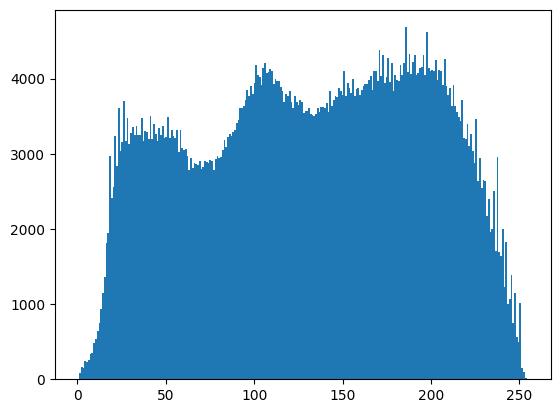

converter uma imagem GRAY para BW (black/white) e exibir em BW


In [7]:
print('='*100)
print('calcular e exibir o histograma da imagem GRAY')
print('='*100)

# Notem que existem outras maneiras para calcular o histograma. 
# No Tutorial 1 usamos a biblioteca do OpenCV pra calcular o histograma.
# Agora estamos usando uma função 'hist' da biblioteca 'matplotlib'
plt.hist(GRAY.ravel(), bins=256, range=[0, 255])
        # 1º parâmetro: GRAY.ravel() é uma função que transforma a matriz de intensidades GRAY que tem 2D (2 dimensões) para um vetor 1D (1 dimensão)
        # 2º parâmetro: bins é a quantidade de níveis de cinza que tem a imagem, neste caso são 256 níveis
        # 3º parâmetro: range é o intervalo dos valores de intensidade de cinza, como são 256 níveis, então varia de 0 a 255
plt.show()

print('='*100)
print('converter uma imagem GRAY para BW (black/white) e exibir em BW')
print('='*100)

# Apesar desta imagem originalmente ser colorida e de certa forma complexa (muitas cores), 
#   analisando o histograma ao escolher o threshold 60 aparenta ter separado as frutas do fundo da imagem
# Para algumas aplicações é bem mais visível esta separação, como por exemplo placa de veículos que geralmente são cinzas e escritas em preto
(thresh, BW) = cv.threshold(GRAY, 60, 255, cv.THRESH_BINARY) 
cv.imshow('',BW)

cv.waitKey(0)

cv.destroyAllWindows()


In [8]:
# uma alternativa para não precisar investigar visualmente o histograma para encontrar o melhor thresholding, é usar métodos da literatura que fazem isto automaticamente.
# são métodos estatísticos já consagrados na literatura e que funcionam muito bem
# um exemplo é o métoo de Otsu, muito bom para separar 2 regiões de uma imagem, quando analisamos o histogramas e separamos por vales (região escura x clara)

(thresh, BW_otsu) = cv.threshold(GRAY, thresh, 255, cv.THRESH_OTSU)
print(f'o valor de threshold retornado do método de Otsu foi: {thresh}')
cv.imshow('',BW_otsu)

cv.waitKey(0)

cv.destroyAllWindows()

# note que para cada imagem processada será analisado o histograma e definido um threshold diferente

o valor de threshold retornado do método de Otsu foi: 128.0


#### FAÇA #3: Converter a imagem CINZA (antiga colorida do seu computador) para BINÁRIA

1.   gerar o histograma da imagem CINZA
2.   analisar o histograma para decidir qual threshold escolher
3.   converter a imagem CINZA para BINÁRIA utilizando o thresold acima 
4.   exibir a imagem BINÁRIA

In [9]:
# FAÇA AQUI O SEU CÓDIGO




#### DESAFIO:

1.   Faça o upload da imagem 'niveis_cinza.png'
2.   ler esta imagem 
3.   exibir esta imagem
4.   gerar o histograma desta imagem e analisar os possíveis thresholdings 
5.   gerar e exibir uma imagem binária que apareça apenas o PRIMEIRO retângulo
6.   gerar e exibir uma imagem binária que apareçam apenas o PRIMEIRO e o SEGUNDO retângulo
7.   gerar e exibir uma imagem binária que apareçam apenas o PRIMEIRO, o SEGUNDO e o TERCEIRO retângulo
8.   gerar e exibir uma imagem binária que apareçam TODOS os retângulos

In [10]:
# FAÇA AQUI O SEU CÓDIGO




##Passo 3: Pré-processamento
Em aplicações reais, as imagens capturadas podem estar com qualidade ruim, precisando assim que sejam pré-processadas antes de serem utilizadas. 

PAAR IMAGENS EM TONS DE CINZA
>Ex1: caso uma imagem vier muito escura, podemos ajustar o brilho forçando um ganho nos pixels. 

> Ex2: o oposto também é válido, caso vier com excesso de brilho, podemos subtrair as intensidades dos pixels.

> Ex3: as vezes convém inverter as cores (o que era PRETO vai para BRANCO e o que era BRANCO vai para PRETO), seja para ser mais confortável para os olhos analisar as imagens ou ainda para gastar menos tinta numa impressão. Isto também funciona para imagens em tons de cinza.  


### Ajuste de brilho (clarear)

In [11]:
# o quanto de brilho ganhar você pode escolher, mas cuidado para não saturar a imagem, ou seja, os valores não podem ultrapassar 255.
# abaixo tem um exemplo de uma função para clarear

print('imagem original')
cv.imshow('',GRAY)

GRAY_mais_brilho = (100.0/255)*GRAY + 100
print('imagem com mais brilho, ou seja, mais clara')
cv.imshow('',GRAY_mais_brilho)

cv.waitKey(0)

cv.destroyAllWindows()

imagem original
imagem com mais brilho, ou seja, mais clara


### Ajuste de brilho (escurecer)

In [12]:
# o quanto de brilho diminuir você pode escolher, mas cuidado para não saturar a imagem, ou seja, os valores não podem ficar menores do que 0.
# abaixo tem um exemplo de uma função para escurecer

print('imagem original')
cv.imshow('',GRAY)

GRAY_menos_brilho = 255.0*(GRAY/255.0)**3
print('imagem com menos brilho, ou seja, mais escuro')
cv.imshow('',GRAY_menos_brilho)

cv.waitKey(0)

cv.destroyAllWindows()

imagem original
imagem com menos brilho, ou seja, mais escuro


### Negativo de uma imagem em tons de cinza


In [13]:
print('imagem original')
cv.imshow('',GRAY)

GRAYnegativo = 255 - GRAY
print('imagem negativa')
cv.imshow('',GRAYnegativo)

cv.waitKey(0)

cv.destroyAllWindows()

imagem original
imagem negativa


### Negativo de uma imagem em preto/branco


In [14]:
print('imagem original')
cv.imshow('',BW)

BWnegativo = 255 - BW
print('imagem negativa')
cv.imshow('',BWnegativo)

cv.waitKey(0)

cv.destroyAllWindows()

imagem original
imagem negativa


#### FAÇA #4: Testar algumas operações matemáticas nas imagens do seu computador

Para as imagens que carregou do seu computador nos exercícios anteriores faça:
1.   clarear (use uma função diferente, de sua escolha)
2.   escurecer (use uma função diferente, de sua escolha)
3.   inverter 


In [15]:
# FAÇA AQUI O SEU CÓDIGO




##Passo 4: Pré-processamento (EQUALIZAÇÃO)
Em aplicações reais, as imagens capturadas podem estar com qualidade ruim, precisando assim que sejam pré-processadas antes de serem utilizadas. 

Uma técnica mais sofisticada para melhorar o contraste da imagem é a equalização. No material de apoio fornecido tem mais detalhes, mas podem consultar na internet também, veja esse exemplo: https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html





In [16]:
# carregar a imagem 'baixo_contraste.jpg'

print('='*100)
print('imagem com baixo contraste')
print('='*100)
img_baixo_contraste_BGR = cv.imread('C:/Users/pedro/OneDrive/ADS/3TERMO/VISAO COMPUTACIONAL I/Tutorial_2_PDI (1)/Tutorial_2_PDI/baixo_contraste.jpg')  
img_baixo_contraste_GRAY = cv.cvtColor(img_baixo_contraste_BGR, cv.COLOR_BGR2GRAY)
cv.imshow('',img_baixo_contraste_GRAY) 

print('='*100)
print('imagem equalizada')
print('='*100)
# OpenCV já tem implementado uma função para equalização
img_equalizada = cv.equalizeHist(img_baixo_contraste_GRAY)
cv.imshow('',img_equalizada) 

cv.waitKey(0)

cv.destroyAllWindows()

imagem com baixo contraste
imagem equalizada


histograma com baixo contraste


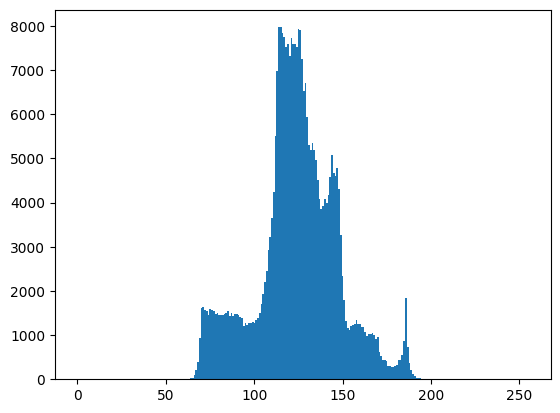

histograma equalizado


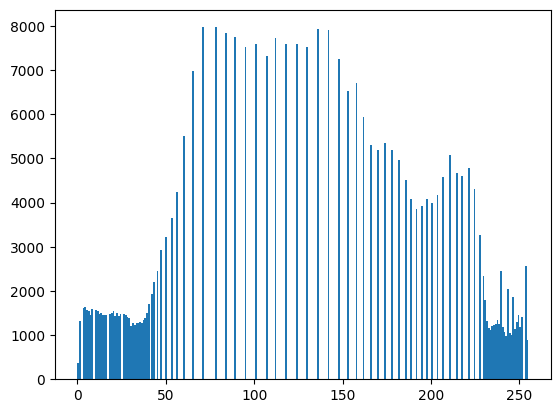

In [17]:
print('='*100)
print('histograma com baixo contraste')
print('='*100)
plt.hist(img_baixo_contraste_GRAY.ravel(), bins=256, range=[0, 255])
plt.show()
# note que as intensidades estão concentradas no meio do histograma
#   sem a presença de pixels mais escuros (próximos de 0)
#   sem a presença de pixels mais claros (próximos de 255)
# por isto a sensação é de uma imagens acinzentada/esfumaçada, ou seja, sem bom contraste

print('='*100)
print('histograma equalizado')
print('='*100)
plt.hist(img_equalizada.ravel(), bins=256, range=[0, 255])
plt.show()
# note que houve um espalhamento na distribuição das intensidades
#    isto reflete na imagem, faz com que ela tenha mais intesidades diferentes
#    agora tem valores próximos a 0 (preto) e próximos a 255 (branco)
# isto é um melhor contraste


#### FAÇA #5: Testar a equalização nas imagens do seu computador

Para as imagens que carregou do seu computador nos exercícios anteriores faça:
1.   equalizar a imagem
2.   exibir a imagem antes e depois
3.   exibir o histograma antes e depois


In [ ]:
# FAÇA AQUI O SEU CÓDIGO


